# Word2Vec Notebook
cleaned python file can be found without notes in word2vec.py

In [24]:
# downloading the packages for the environment

#!pip install gensim
#!pip install matplotlib
#!pip install scikit-learn==1.3.1

In [25]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Creating/implementing the pretrained model. This will be used later to determine biases in language

Data can be found here - https://www.kaggle.com/datasets/adarshsng/googlenewsvectors

In [26]:
model_path = "/Users/anni/Library/CloudStorage/OneDrive-EastsidePreparatorySchool/High School/12th Grade/IP/GoogleNews-vectors-negative300.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

## Part 1: exploring word2vec

In Word2Vec, each word is represented as a vector in a multi-dimensional space with each index in the vector representing a specific feature and that index value being the mathematical representation of the word described by that feature dimension(e.g. [0.3, 0.8] could be a vector for "grandpa" and the second value represents the age dimension). Words sharing semantic similarities (think of synonyms) will be spacially closer to each other.


Word2Vec has two different architectures: skipgram and continous bag of words (cbow)
* skip gram: based on a target word, the model will predict the words around it
* cbow: based on the words in the sentence around the target word, the model will predict the missing word 


To measure semantic similarities between words, word2vec utilizes cosine similarity. Cosine similarity calculates the cosine of the angle between two vectors. This value ranges from -1 to 1, where 1 means the vectors are in the same direction (high similarity), 0 indicates orthogonality (no similarity), and -1 means they are in opposite directions (high dissimilarity). Essentially it's measuring the cosine of the angle between two word vectors.


Cosine similarity is used over euclidean distance because it is less affected by the magnitude of the vectors. This is crucial since the frequency of words (which could affect vector magnitude/length) does not necessarily imply semantic similarity.


In [27]:
# Finding similar words to loud
word = 'loud'
similar_words = model.most_similar(word, topn=10)
print(f"Words similar to {word}:")

for word, score in similar_words:
    print(f"\t{word} - {score}\n")

Words similar to loud:
	noisy - 0.6621273159980774

	loudly - 0.636400580406189

	fer_cryin - 0.6316129565238953

	deafening - 0.6294395327568054

	Loud - 0.6140207052230835

	loudest - 0.5992903113365173

	obnoxiously_loud - 0.5985252261161804

	ear_splitting - 0.597548246383667

	screeching_noises - 0.5830792188644409

	muffled - 0.5812103152275085



In [28]:
# Finding similar words to amazon
word = 'amazon'
similar_words = model.most_similar(word, topn=10)
print(f"Words similar to {word}:")

for word, score in similar_words:
    print(f"\t{word} - {score}\n")

Words similar to amazon:
	itunes - 0.5846980810165405

	play.com - 0.5455037951469421

	cli - 0.543582022190094

	adobe_acrobat - 0.5393003821372986

	amiga - 0.5359835624694824

	canada - 0.5305779576301575

	Amazon - 0.5263347625732422

	sony - 0.5243285298347473

	dvd - 0.5242242813110352

	bluray - 0.5225474834442139



In [29]:
# Finding similar words to therefore
word = 'therefore'
similar_words = model.most_similar(word, topn=10)
print(f"Words similar to {word}:")

for word, score in similar_words:
    print(f"\t{word} - {score}\n")

Words similar to therefore:
	consequently - 0.7405011057853699

	hence - 0.702417254447937

	moreover - 0.6448609232902527

	Therefore - 0.6114173531532288

	furthermore - 0.6039420366287231

	thus - 0.5615307092666626

	Consequently - 0.5579942464828491

	Hence - 0.5381782650947571

	Thirdly - 0.5330169200897217

	because - 0.5318125486373901



Plotting random words that have some relation and looking at how they are on a graph.
First I'm creating an array of words to visualize. Then I'm looping through to get the actual numerical vectors for each word along with their labels (which should be the word). then using those I can plot the words on a graph

Note: because this plot is 2D we cannot completely accurately visualize the semantic representations

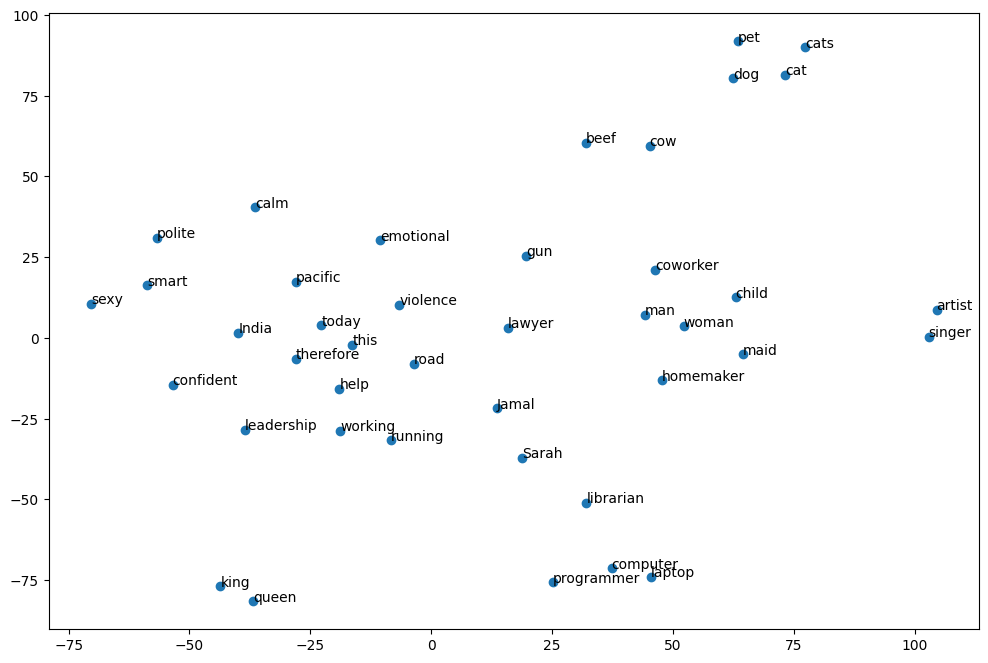

In [30]:
# Making graphs and visualizations

# https://stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim
# for help with visualization

# Figure 1: A 2D graph of word-vectors in relation to each other
#List of specific words to visualize
specific_words = ["king", "queen", "man", "woman", "computer", "laptop", "coworker", "cat", "dog", "pet", "child", "working", "cats", 
                  "lawyer","singer", "artist", "librarian", "programmer", "maid", "homemaker", "leadership", "sexy", "emotional", "calm", 
                  "smart", "polite", "confident", "this", "therefore", "help", "running", "gun", "violence", "Jamal", "Sarah", "India", "road", 
                  "cow", "beef", "today", "pacific"]

#Extract vectors for the specific words
word_vectors = np.array([model[word] for word in specific_words if word in model])

# Extract vectors for the specific words and pair them with their labels
word_label_pairs = [(word, model[word]) for word in specific_words if word in model.key_to_index]
words_to_plot = [pair[0] for pair in word_label_pairs] # the words/labels to plot
vectors_to_plot = np.array([pair[1] for pair in word_label_pairs]) # the actual mathematical vectors to be plotted




# Apply t-SNE for dimensionality reduction to make it 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=min(5, len(word_vectors) - 1))
Y = tsne.fit_transform(vectors_to_plot)

# Plot the results as a graph
plt.figure(figsize=(12, 8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words_to_plot, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()

The graph looks fairly confusing since it's in 2D so many of the dimensions are reduced. You can still see clusters, like 'man', 'woman', 'child', 'homemaker', 'maid', and there's 'artist', 'singer', so the clusters make sense. But also they don't make too much sense when they're overlaid each other

## Part 2: Exploring Gender Bias in Words

One way we can do this is by doing vector math. We can do vector addition and subtraction to get to new vectors. Some of my results are located in tracker.xlsx sheet.

In [31]:
print("testing vector math:")
# Trying math to see most similar single word
# ex: king + woman - man should be queen
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"\n\t the result is: {result}")

testing vector math:

	 the result is: [('queen', 0.7118192911148071)]


In [32]:
# What about looking another word?
result = model.most_similar(positive=['CEO', 'he'], negative=['she'], topn=10)
print(f"\n\t the result is: {result}")


	 the result is: [('Chief_Executive_Officer', 0.691335916519165), ('COO', 0.6871274709701538), ('chief_executive', 0.6835318207740784), ('Chief_Operating_Officer', 0.6726173162460327), ('Chief_Executive', 0.6467347741127014), ('Chairman', 0.6230553388595581), ('chairman', 0.5836375951766968), ('ceo', 0.5829241871833801), ('Managing_Director', 0.5804635286331177), ('CTO', 0.5742257237434387)]


In [33]:
# Speeding the process up by just looping through an array and printing out the first result:

traits = ["nurturing", "loyal", "strong", "kind", "honest", "independent", "leadership", "sexy", "emotional", "calm", "smart", "polite", 
          "confident", "agreeable", "assertive", "passive", "dominant", "competitive", "hardworking", "cute", "talented"]
for x in traits:
    new_trait = model.most_similar(positive=[x, 'he'], negative=['she'], topn=1)
    print(x + f" - 'she' + 'he': {new_trait}\n")

nurturing - 'she' + 'he': [('nurture', 0.5628977417945862)]

loyal - 'she' + 'he': [('fiercely_loyal', 0.5910407900810242)]

strong - 'she' + 'he': [('solid', 0.5874135494232178)]

kind - 'she' + 'he': [('sort', 0.6544800400733948)]

honest - 'she' + 'he': [('dignity_Aujali', 0.5113795399665833)]

independent - 'she' + 'he': [('indepedent', 0.48129671812057495)]

leadership - 'she' + 'he': [('leader', 0.5210046172142029)]

sexy - 'she' + 'he': [('suave', 0.5243145227432251)]

emotional - 'she' + 'he': [('Emotional', 0.5070326924324036)]

calm - 'she' + 'he': [('calmness', 0.5488001704216003)]

smart - 'she' + 'he': [('shrewd', 0.49839869141578674)]

polite - 'she' + 'he': [('courteous', 0.5959535837173462)]

confident - 'she' + 'he': [('optimistic', 0.5900174379348755)]

agreeable - 'she' + 'he': [('amenable', 0.5238919854164124)]

assertive - 'she' + 'he': [('forceful', 0.5059183835983276)]

passive - 'she' + 'he': [('passively', 0.4494434595108032)]

dominant - 'she' + 'he': [('domin

There are some interesting ones! For example:
* 'smart' - 'she' + 'he' = 'shrewd'? --> (having or showing sharp powers of judgment; astute.) --> shrewd feels more knowing and menacing than just smart
* 'cute' - 'she' + 'he' = 'goofy'? --> could this imply that men don' tneed to look as good and be more personable compared to women?
* 'sexy' - 'she' + 'he' = 'suave'? --> (dictionary def: charming, confident, and elegant (typically used of a man)).
* 'talented' - 'she' + 'he' = 'supremely_talented' --> why include supremely?

Here are more examples with professions now:

In [34]:
professions = ["doctor", "nurse", "engineer", "teacher", "lawyer","singer", "artist", "librarian", "programmer", "maid", "homemaker", "chef", "CEO",
                "manager", "lawyer", "paralegal", "attendent", "secretary", "attorny", "athlete", "mechanic", "veteran", "scientist", "salesman", 
                "pitcher", "surgeon", "construction"]
for x in professions:
    new_job = model.most_similar(positive=[x, 'he'], negative=['she'], topn=1)
    print(x + f" - 'she' + 'he': {new_job}\n")

doctor - 'she' + 'he': [('physician', 0.6272261738777161)]

nurse - 'she' + 'he': [('doctor', 0.5559605360031128)]

engineer - 'she' + 'he': [('mechanical_engineer', 0.5987629294395447)]

teacher - 'she' + 'he': [('headmaster', 0.5383645296096802)]

lawyer - 'she' + 'he': [('attorney', 0.6044192910194397)]

singer - 'she' + 'he': [('musician', 0.6257969737052917)]

artist - 'she' + 'he': [('painter', 0.5902706384658813)]

librarian - 'she' + 'he': [('reference_librarian', 0.5323277711868286)]

programmer - 'she' + 'he': [('programer', 0.5130866765975952)]

maid - 'she' + 'he': [('housekeeper', 0.48172757029533386)]

homemaker - 'she' + 'he': [('carpenter', 0.5112387537956238)]

chef - 'she' + 'he': [('Chef', 0.6438316702842712)]

CEO - 'she' + 'he': [('Chief_Executive_Officer', 0.691335916519165)]

manager - 'she' + 'he': [('mananger', 0.5896837115287781)]

lawyer - 'she' + 'he': [('attorney', 0.6044192910194397)]

paralegal - 'she' + 'he': [('Denner_Pellegrino', 0.44760823249816895)]


Notes:
* homemaker -> carpenter
* teacher -> headmaster
* nurse -> doctor

some indications of power structure and male vs female roles/typical jobs?
* according to https://nces.ed.gov/programs/coe/indicator/clr/public-school-teachers, 77% public school teachers are female, 23% male


Overall, it's hard to see if there are gender biases just off vector math alone since we'd have to be aware of the stereotypes and micro-stereotypes as well as inherient biases that we already hold. So another way we can look for potential bias is through visualization.

### Graphing Gender Bias


We want to create a subspace, Gender Subspace, for the larger vector space, V, of all words in Word2Vec. Basically this Gender Subspace has the same properties as V but also specifically defined by the set of vectors that define gender. However we can only currently calculate one aspect of the gender difference using two most similar vectors which may have the least number of different dimensions to get the best projection vector. In this case we'll use 'he' and 'she'

Here blue will indicate leaning towards male, and pink, female

In [57]:
gender_vector = model["he"]-model["she"] # assuming that every other dimension is the same other than the gender dimension, 'he'-'she' should result in a vector that diffrentiates males from females

# here we are testing gender biases in professions
def compute_projection_score(x, vector_direction, model):
    # getting the embedding for the profession
    x_vector = model[x]

     # projecting the profession vector onto the gender direction
     # need the dot product of the gender direction vector and the vector making up the word in the profession array
     # normalize/divide by magnitude of the gender direction vector
    return x_vector.dot(vector_direction) / np.linalg.norm(vector_direction)


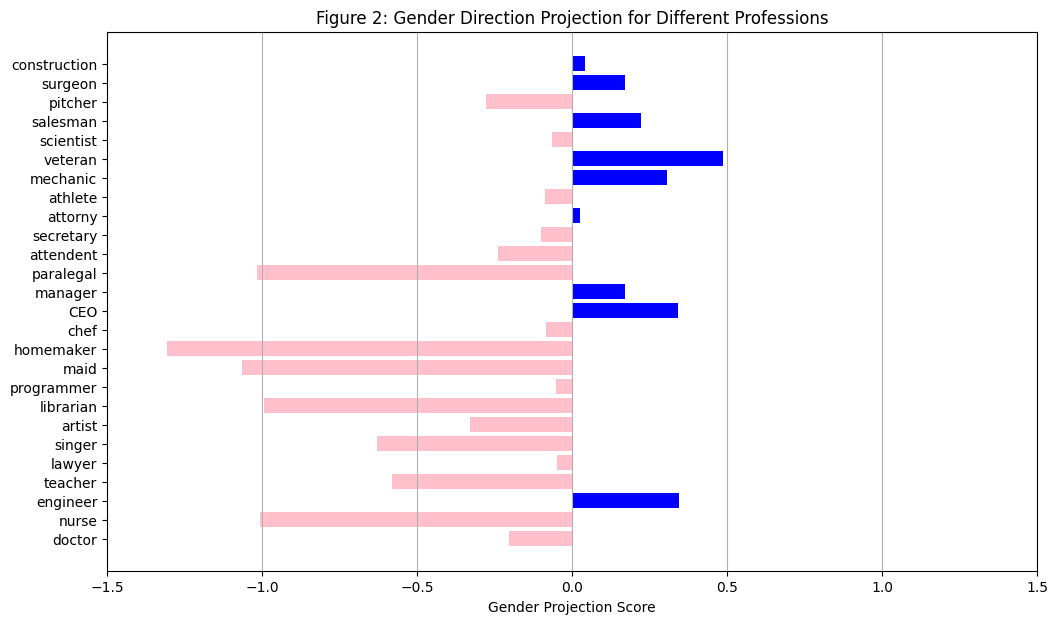

In [58]:
# array of jobs
professions = ["doctor", "nurse", "engineer", "teacher", "lawyer","singer", "artist", "librarian", "programmer", "maid", "homemaker", "chef", "CEO", "manager", "lawyer", "paralegal", "attendent", "secretary", "attorny", "athlete", "mechanic", "veteran", "scientist", "salesman", "pitcher", "surgeon", "construction"]
gender_scores = [compute_projection_score(prof, gender_vector, model) for prof in professions]

# visualising!
plt.figure(figsize=(12, 7))
plt.barh(professions, gender_scores, color=['blue' if score > 0 else 'pink' for score in gender_scores])
plt.xlabel("Gender Projection Score")
plt.title("Figure 2: Gender Direction Projection for Different Professions")
plt.grid(axis='x')
plt.xlim(-1.5, 1.5)

plt.show()


Notes:
* more female leaning in general

Now looking at attributes and gender:

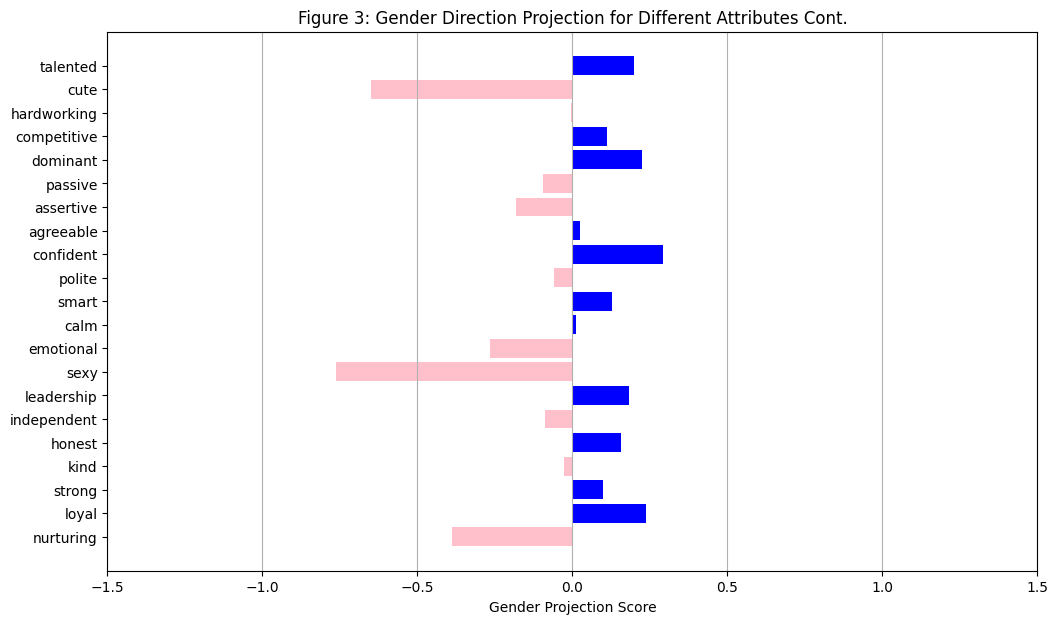

In [59]:
attributes = ["nurturing", "loyal", "strong", "kind", "honest", "independent", "leadership", "sexy", "emotional", "calm", "smart", "polite", "confident", "agreeable", "assertive", "passive", "dominant", "competitive", "hardworking", "cute", "talented"]
gender_scores = [compute_projection_score(atr, gender_vector, model) for atr in attributes]

# visualising!
plt.figure(figsize=(12, 7))
plt.barh(attributes, gender_scores, color=['blue' if score > 0 else 'pink' for score in gender_scores])
plt.xlabel("Gender Projection Score")
plt.title("Figure 3: Gender Direction Projection for Different Attributes Cont.")
plt.grid(axis='x')
plt.xlim(-1.5, 1.5)

plt.show()

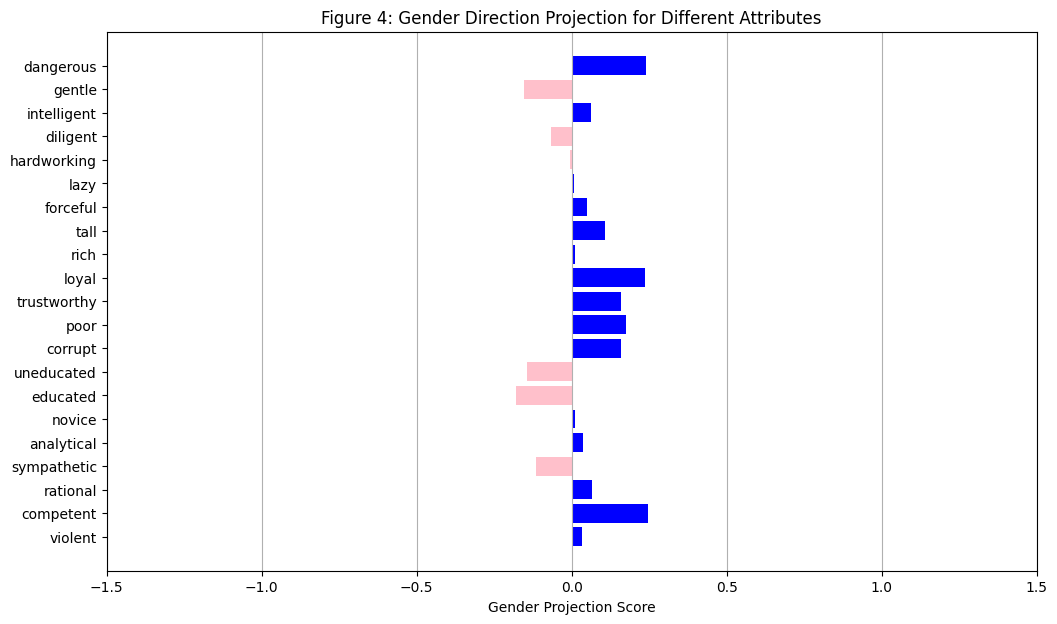

In [60]:
attributes2 = ["violent", "competent", "rational", "sympathetic", "analytical", "novice", "educated", "uneducated", "corrupt", "poor", "trustworthy", "loyal", "poor", "rich", "tall", "forceful", "lazy", "hardworking", "diligent", "intelligent", "gentle", "dangerous"]
gender_scores = [compute_projection_score(atr, gender_vector, model) for atr in attributes2]

# visualising!
plt.figure(figsize=(12, 7))
plt.barh(attributes2, gender_scores, color=['blue' if score > 0 else 'pink' for score in gender_scores])
plt.xlabel("Gender Projection Score")
plt.title("Figure 4: Gender Direction Projection for Different Attributes")
plt.grid(axis='x')
plt.xlim(-1.5, 1.5)

plt.show()

Notes:

Now looking at just a random set of words (theoretically there shouldn't be some sort of bias in them):

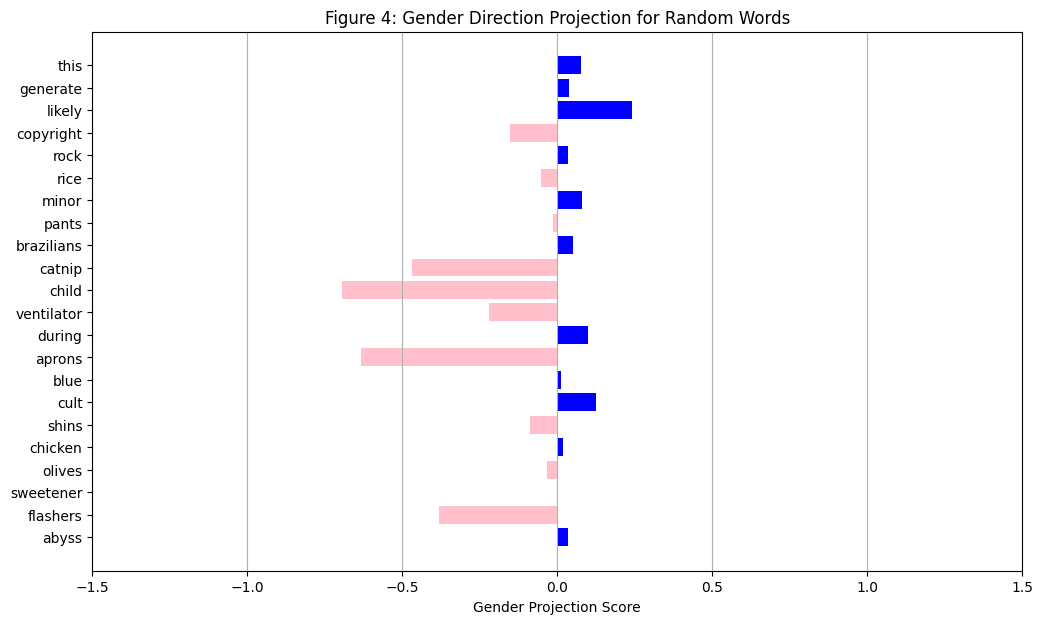

In [61]:
random = ["abyss", "flashers", "sweetener", "olives", "chicken", "shins", "cult", "blue", "aprons", "during", "ventilator", "child", "catnip", "brazilians", "pants", "minor", "rice", "rock", "copyright", "likely", "generate", "this"]
gender_scores = [compute_projection_score(x, gender_vector, model) for x in random]

# visualising!
plt.figure(figsize=(12, 7))
plt.barh(random, gender_scores, color=['blue' if score > 0 else 'pink' for score in gender_scores])
plt.xlabel("Gender Projection Score")
plt.title("Figure 4: Gender Direction Projection for Random Words")
plt.grid(axis='x')
plt.xlim(-1.5, 1.5)

plt.show()

Notes: 
* I was expecting gender projection scores around 0...I'm surprised there are some high ones. Granted they aren't as high as some of the words in the previous lists.
* Looking at 'aprons', I guess you could make a correlation, because of the women belong in the kitched stereotype? 
* 'Child' I could assume that it could because women are more associated with children than men
* I think 'likely' is interesting because it's an adverb...could it be in news articles about men the word was more used?
* 'this' also is more male biased? I wonder why?


# Part 3: Exploring Racial Bias in Words

Here I'm just doing the same graphs that I did for the genders. I'm also going to focus on black vs white because I think stereotypes can easily be seen there
Blue is towards 'african', pink towards 'american'

In [92]:
race_vector = model["african"]-model["american"] # african - american
race_vector2 = model["DeShawn"]-model["Jake"] # first names from https://abcnews.go.com/2020/top-20-whitest-blackest-names/story?id=2470131 list corresponding to the races

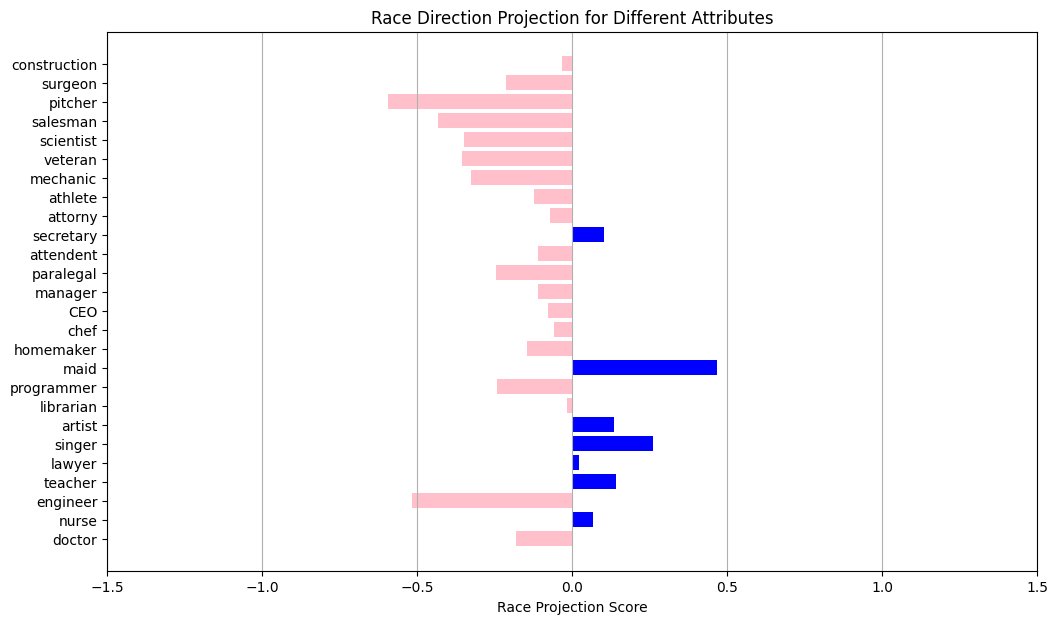

In [93]:
# professions first 

professions = ["doctor", "nurse", "engineer", "teacher", "lawyer","singer", "artist", "librarian", "programmer", "maid", "homemaker", "chef", "CEO", "manager", "lawyer", "paralegal", "attendent", "secretary", "attorny", "athlete", "mechanic", "veteran", "scientist", "salesman", "pitcher", "surgeon", "construction"]
race_scores = [compute_projection_score(job, race_vector, model) for job in professions]

plt.figure(figsize=(12, 7))
plt.barh(professions, race_scores, color=['blue' if score > 0 else 'pink' for score in race_scores])
plt.xlabel("Race Projection Score")
plt.title("Figure 5: Race Direction Projection for Different Professions")
plt.grid(axis='x')
plt.xlim(-1.5, 1.5)


plt.show()


Notes: not that many african leaning words. I guess some are surprising, like I thought athlete would be blue. The projection score isnt high-high though. To be fair in the data I guess some jobs aren't used much which may make the score higher because of it's relation to the article?

Another way we could find the difference in race is through names? Thats what some people have tried, so I'm going to see if it has a different result for races in professions.

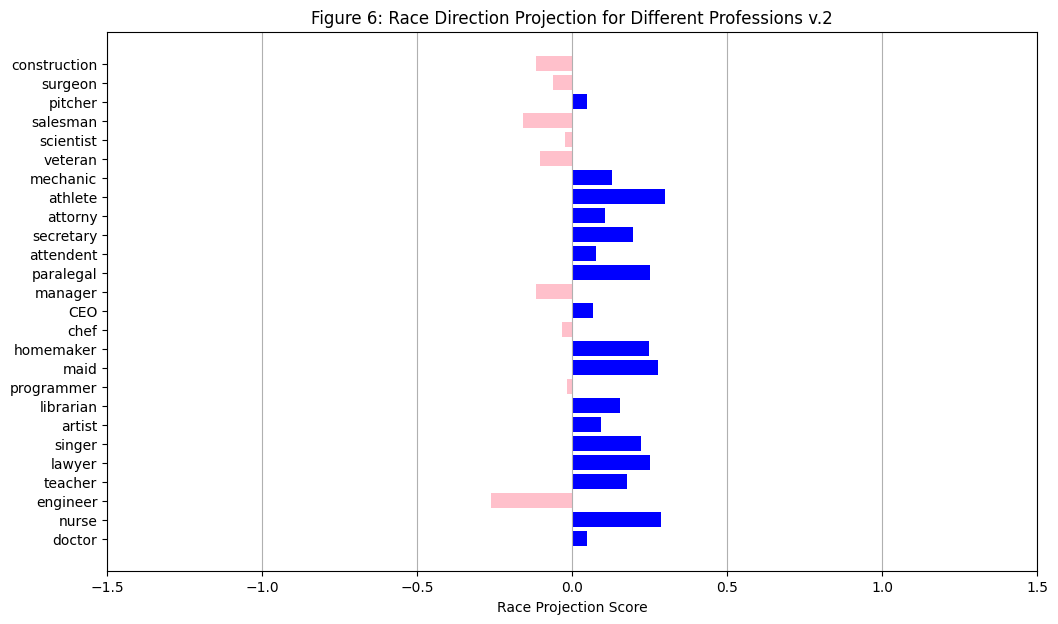

In [106]:
# using names instead of outright race

professions = ["doctor", "nurse", "engineer", "teacher", "lawyer","singer", "artist", "librarian", "programmer", "maid", "homemaker", "chef", "CEO", "manager", "lawyer", "paralegal", "attendent", "secretary", "attorny", "athlete", "mechanic", "veteran", "scientist", "salesman", "pitcher", "surgeon", "construction"]
race_scores = [compute_projection_score(job, race_vector2, model) for job in professions]

plt.figure(figsize=(12, 7))
plt.barh(professions, race_scores, color=['blue' if score > 0 else 'pink' for score in race_scores])
plt.xlabel("Race Projection Score")
plt.title("Figure 6: Race Direction Projection for Different Professions v.2")
plt.grid(axis='x')
plt.xlim(-1.5, 1.5)


plt.show()


Notes: With names, suddenly things become more blue leaning. In figure 5, the biases in our language towards black people seem evident by the fact that the more power holding jobs are more white leaning while the subordinate jobs are more black leaning. It's very different for the names though...way less white people words

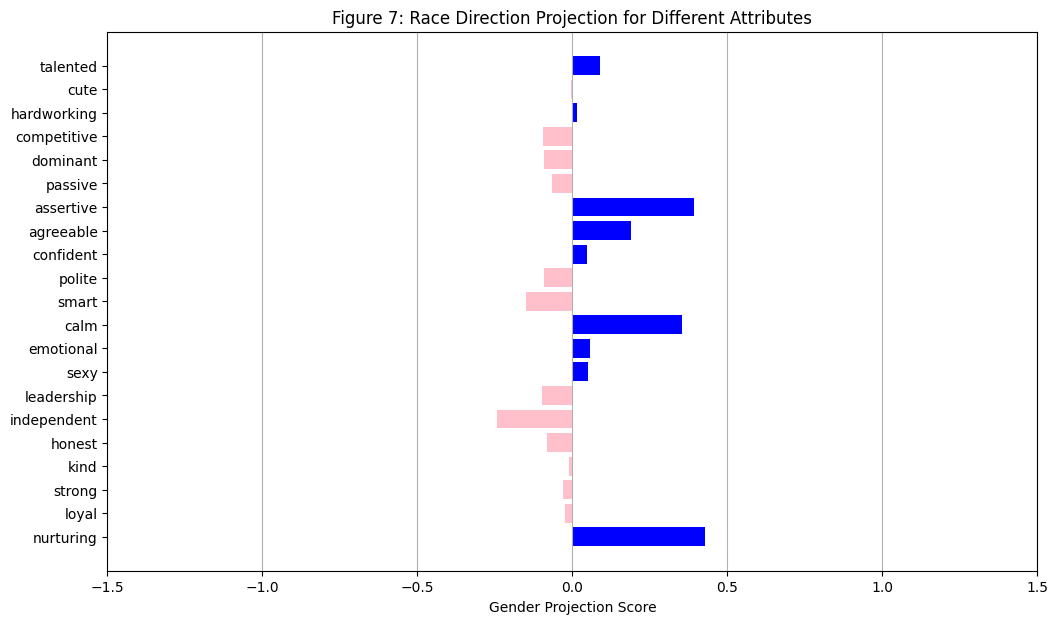

In [97]:
attributes = ["nurturing", "loyal", "strong", "kind", "honest", "independent", "leadership", "sexy", "emotional", "calm", "smart", "polite", "confident", "agreeable", "assertive", "passive", "dominant", "competitive", "hardworking", "cute", "talented"]
race_scores = [compute_projection_score(atr, race_vector, model) for atr in attributes]

# visualising!
plt.figure(figsize=(12, 7))
plt.barh(attributes, race_scores, color=['blue' if score > 0 else 'pink' for score in race_scores])
plt.xlabel("Race Projection Score")
plt.title("Figure 7: Race Direction Projection for Different Attributes")
plt.grid(axis='x')
plt.xlim(-1.5, 1.5)

plt.show()

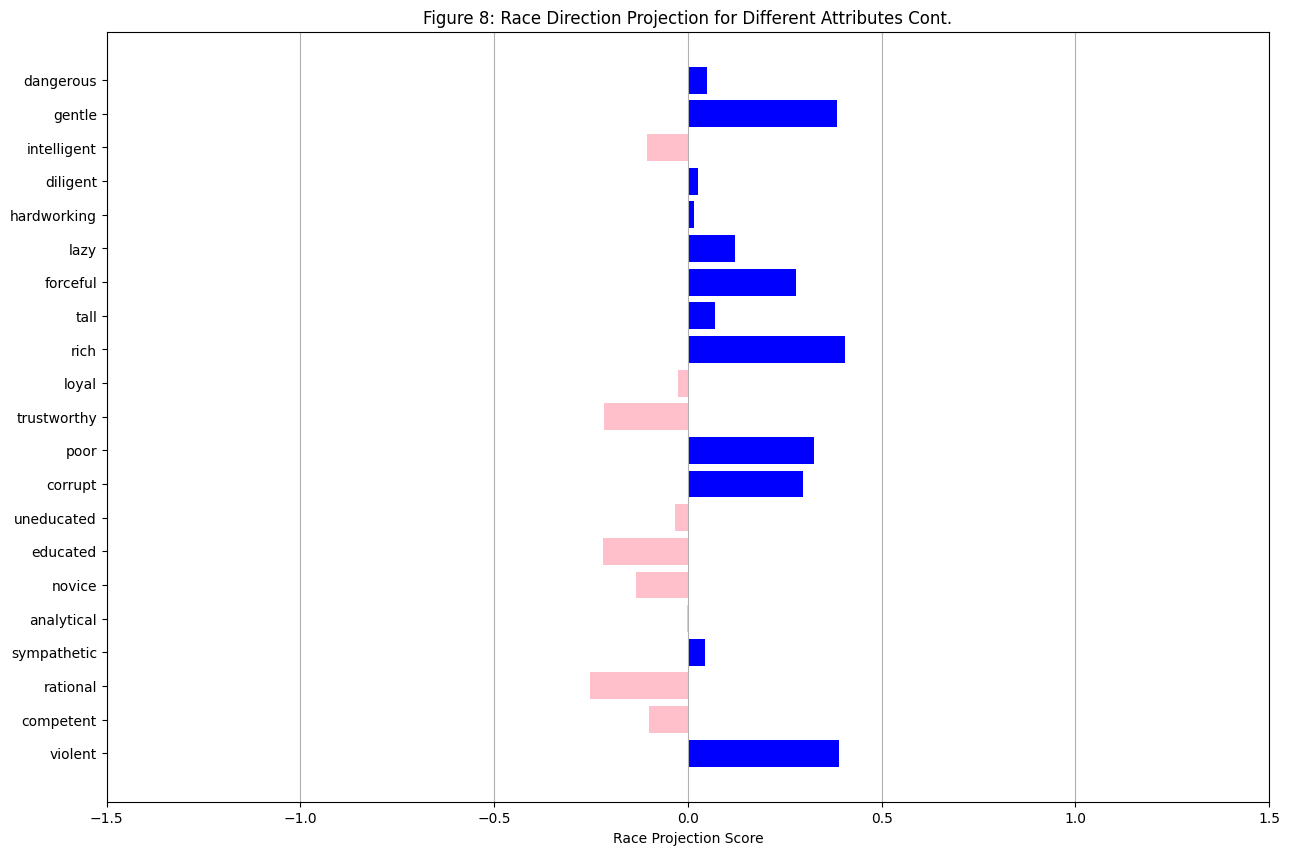

In [107]:
attributes2 = ["violent", "competent", "rational", "sympathetic", "analytical", "novice", "educated", "uneducated", "corrupt", "poor", "trustworthy", "loyal", "poor", "rich", "tall", "forceful", "lazy", "hardworking", "diligent", "intelligent", "gentle", "dangerous"]
race_scores = [compute_projection_score(atr, race_vector, model) for atr in attributes2]


plt.figure(figsize=(15, 10))
plt.barh(attributes2, race_scores, color=['blue' if score > 0 else 'pink' for score in race_scores])
plt.xlabel("Race Projection Score")
plt.title("Figure 8: Race Direction Projection for Different Attributes Cont.")
plt.grid(axis='x')
plt.xlim(-1.5,1.5)

plt.show()

Note: I'm not too surprised by the results. It does fit with the stereotypes.

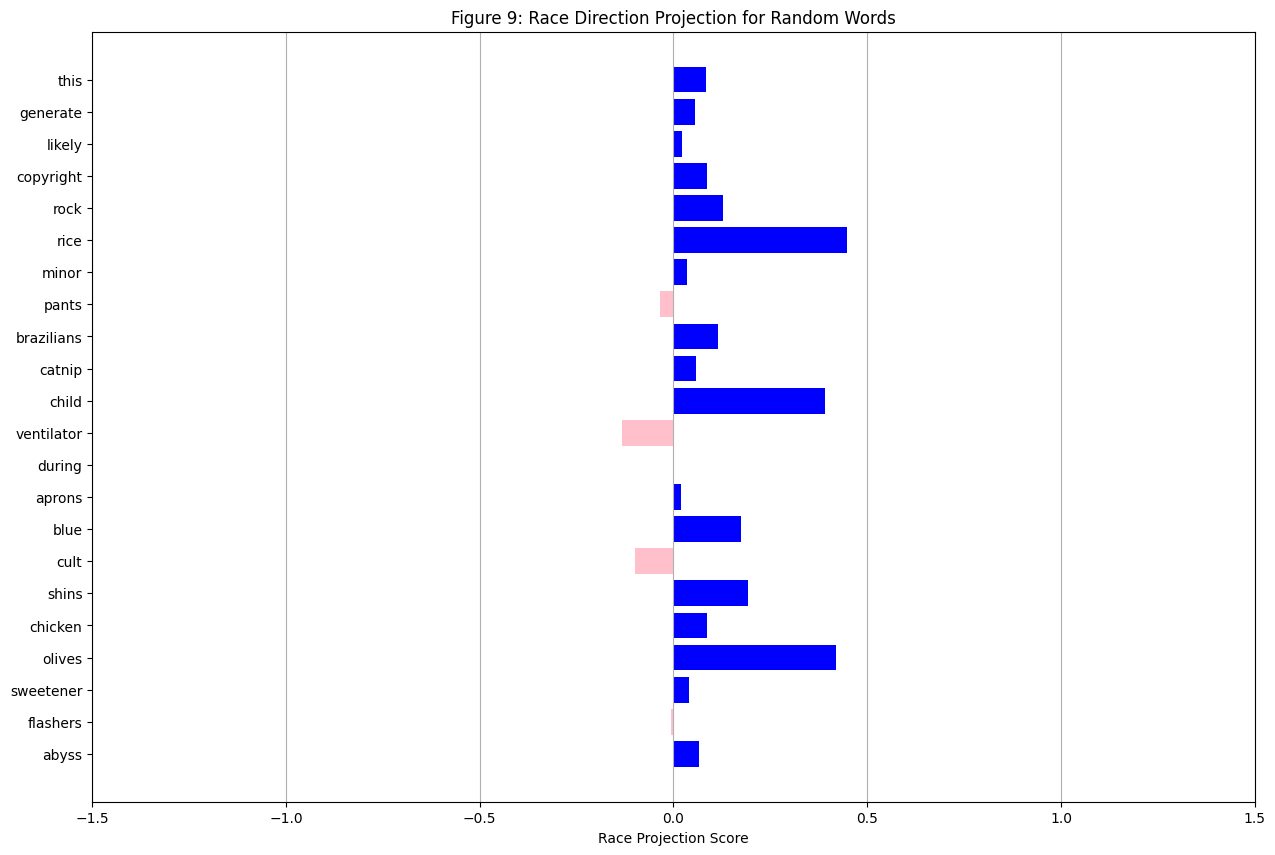

In [108]:
random = ["abyss", "flashers", "sweetener", "olives", "chicken", "shins", "cult", "blue", "aprons", "during", "ventilator",
           "child", "catnip", "brazilians", "pants", "minor", "rice", "rock", "copyright", "likely", "generate", "this"]
race_scores = [compute_projection_score(x, race_vector, model) for x in random]


plt.figure(figsize=(15, 10))
plt.barh(random, race_scores, color=['blue' if score > 0 else 'pink' for score in race_scores])
plt.xlabel("Race Projection Score")
plt.title("Figure 9: Race Direction Projection for Random Words")
plt.grid(axis='x')
plt.xlim(-1.5,1.5)

plt.show()


Notes: No scores over/under 0.5, so relatively low race projection score but still some words are relatively high compared to others. Like rice? Maybe because it's 'more ethnic', idk. 'This' is also interesting because I would think it'd be similar to 'during' where theres absolutely nothing.

# Overall Notes

Trained on google news data (I'm not sure when the data was taken though, but words like Covid don't exist)

Racially, I'm not surprised by the stereotypes. Genderwise too actually. There are many stereotypes in the wording bias. There's possibly some that I'm missing too because I'm not 100% knowledgable about all the stereotypes.

Ex: I didn't know gifting chicken could be seen as racist - https://www.youtube.com/watch?v=Ah0gW25F_PY


Notes relating to reasons for bias:
* selection bias in news reporting --> people chose what to write about so viewpoints could be skewed to one side + reporters chose how they write about news articles
* societal bias --> there just is bias 
* time period --> doesn't exclude covid time so some of the news must be fairly old. Events in general (if covered a lot ) would skew the words and probably add more bias

